In [2]:
from matplotlib import pyplot as plt
import numpy as np

from helper_functions import generate_x
from QHO_Analytical import QHO_analytical_soloution
from QuantumHarmonics_QHO import QHO_simulation
#from hydrogen_analytical import hydrogen_analytical_soloution
#from QuantumHarmonics_Hydrogen import hydrogen_simulation

### - Testing solvers vs QHO analytical soloution to quantify error 
def plot_e_vals_comparison(n_vals, e_vals, analytical_e_vals):
    """
    Input: N: 
        Int value for number of points to divide the spatial range into, 
        maxE_val: maximum desired eigenvalue, 
        potential_function: pass in function for potential energy (allows this to be used for both QHO and Hydrogen)
        analytical_function: pass in function for analytical eigenvalues (allows this to be used for both QHO and Hydrogen)

    Returns:
        e_vals: 1D array of eigenvalues from the tridiagonal solver
        E_vectors_tridiag: 2D array of eigenvectors from the tridiagonal solver
        abs_error_vals: 1D array of the absolute error between the analytical and tridiagonal solver eigenvalues
        x: 1D array of spatial x values
        V: 1D array of potential energy values

        """
    #Calculating error of simulation relative to the analytical result
    abs_error_vals = abs(analytical_e_vals - e_vals.real)

    ### - Plotting
    plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)
    
    #plotting analytical results vs n compared to my results vs n
    main_plot = plt.subplot(1,2,1)
    plt.xlabel("Eigenvalue number $(n)$")
    plt.ylabel("Energy $(\\frac{1}{2}ℏ𝜔)$")
    plt.scatter(n_vals, analytical_e_vals, c='r', label='Analytical',)
    plt.plot(n_vals, e_vals.real, c='g', label='Simulated')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.legend()

    # calculate the relative error in percent
    relative_error = (abs_error_vals / analytical_e_vals) * 100

    #Plotting error vs n
    plt.subplot(1,2,2)
    plt.xlabel("Eigenvalue number $(n)$")
    plt.ylabel("Abs Error $(\\frac{1}{2}ℏ𝜔)$", color='g')
    plt.plot(n_vals,abs_error_vals, c='g', label='simulation abs error')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.legend()


    # add new y axis on right side of plot to show error
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.set_ylabel('Relative Error $(\\%)$', color='y') 
    plt.plot(n_vals,relative_error, c='y', label='simulation rel error')

    plt.legend()  # fix by removing plot helper
    plt.show()
    
def plot_e_vecs_comparison(n_vals, x, e_vectors, analytical_e_vectors):

    integrals = []
    for e_vec in e_vectors:
        integrals.append(np.trapz(e_vec**2, x))
    integrals = np.array(integrals)

    #Calculating error of simulation relative to the analytical result
    abs_error_vals = abs(1 - integrals)
    # calculate the relative error in percent
    relative_error = (abs_error_vals / 1) * 100     # / 1 unnecessary but included for clarity
    
    ### - Plotting
    plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)
    
    #plotting analytical results vs n compared to my results vs n
    plt.subplot(1,2,1)
    plt.xlabel("Eigenvalue number $(n)$")
    plt.ylabel("Energy $(\\frac{1}{2}ℏ𝜔)$")
    plt.scatter(n_vals, np.full_like(n_vals, 1), c='r', label='Analytical',)
    plt.plot(n_vals, integrals, c='g', label='Simulated')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.legend()



    #Plotting error vs n
    plt.subplot(1,2,2)
    plt.xlabel("Eigenvalue number $(n)$")
    plt.ylabel("Abs Error $(\\frac{1}{2}ℏ𝜔)$", color='g')
    plt.plot(n_vals, abs_error_vals, c='g', label='simulation abs error')
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.legend()
    

    # add new y axis on right side of plot to show error
    ax = plt.gca()
    ax2 = ax.twinx()
    ax2.set_ylabel('Relative Error $(\\%)$', color='y') 
    plt.plot(n_vals, relative_error, c='y', label='simulation rel error')
    plt.show()
    
def test_QHO_accuracy(N, x_min, x_max, min_n, max_n):

    # spatial discretisation
    x, delta_x = generate_x(x_min, x_max, N)  

    print("Testing QHO accuracy")
    print("N: ", N)
    print("Min x: ", x_min)
    print("Max x: ", x_max)
    print("Delta x", delta_x)
    print("Min n: ", min_n)
    print("Max n: ", max_n)


    #Analytical solution
    n_vals, e_vals_analytical, e_vectors_analytical, p_densitys_analytical = QHO_analytical_soloution(x, max_n, min_n)

    #Simulation
    V_qho, e_vals, e_vectors, p_densitys = QHO_simulation(x, delta_x, max_n, min_n)

    #Comparing results
    plot_e_vals_comparison(n_vals, e_vals, e_vals_analytical)
    plot_e_vecs_comparison(n_vals, x, e_vectors, e_vectors_analytical)

def test_hydrogen_accuracy(N, r_min, r_max, min_n, max_n):

    # spatial discretisation
    x, delta_x = generate_x(r_min, r_max, N)   

    #Analytical solution
    n_vals, e_vals_analytical, e_vectors_analytical, p_densitys_analytical = hydrogen_analytical_soloution(x, max_n, min_n)

    #Simulation
    V_qho, e_vals, e_vectors, p_densitys = hydrogen_simulation(x, delta_x, max_n, min_n)

    #Comparing results
    plot_e_vals_comparison(n_vals, e_vals, e_vals_analytical)
    plot_e_vecs_comparison(n_vals, x, e_vectors, e_vectors_analytical)

Testing QHO accuracy
N:  99
Min x:  -5
Max x:  5
Delta x 0.10101010101010101
Min n:  0
Max n:  100


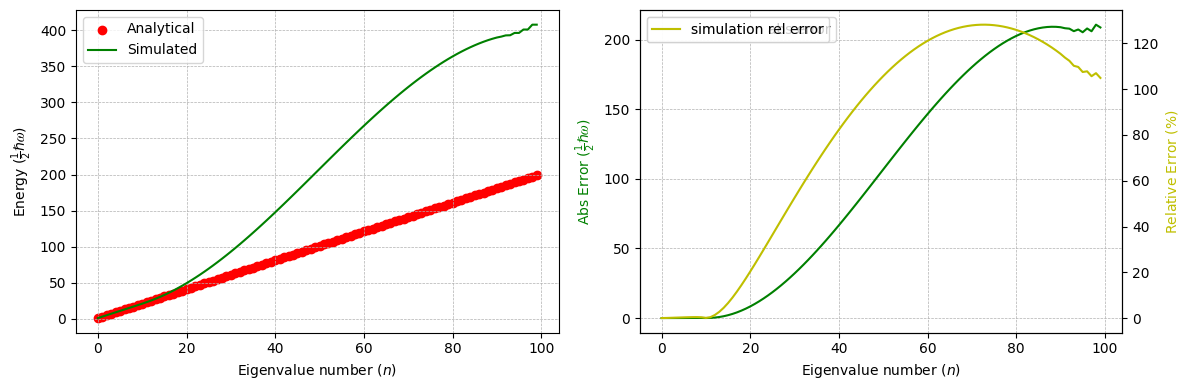

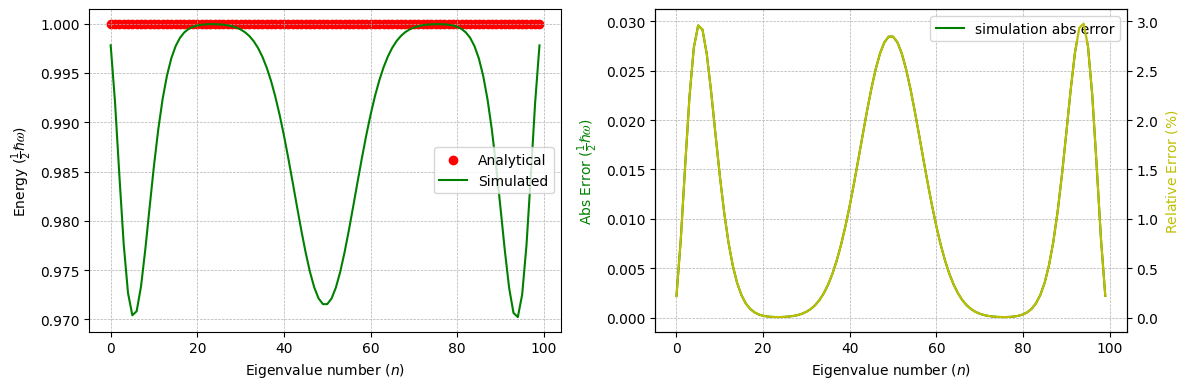

In [3]:
test_QHO_accuracy(N=99, x_min=-5, x_max=5, max_n=100, min_n=0)

Testing QHO accuracy
N:  99
Min x:  -50
Max x:  50
Delta x 1.0101010101010102
Min n:  0
Max n:  100


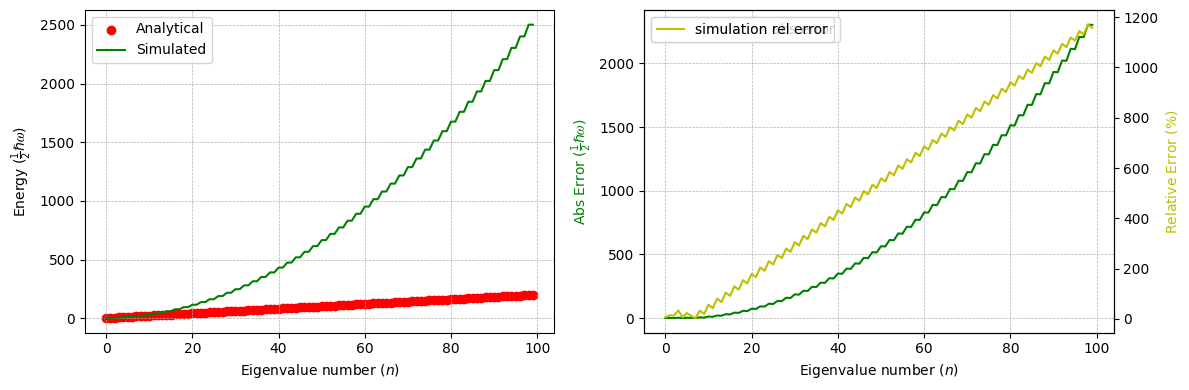

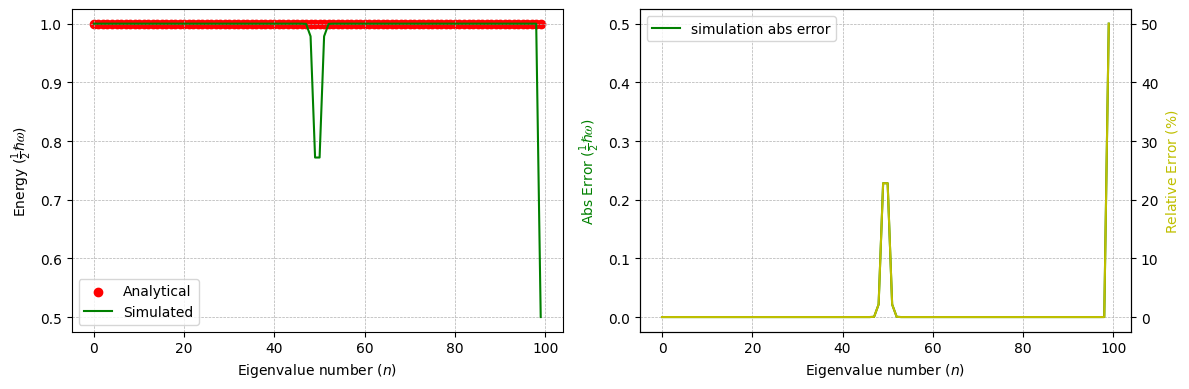

In [4]:
test_QHO_accuracy(N=99, x_min=-50, x_max=50, max_n=100, min_n=0)

Testing QHO accuracy
N:  99
Min x:  -150
Max x:  150
Delta x 3.0303030303030303
Min n:  0
Max n:  100


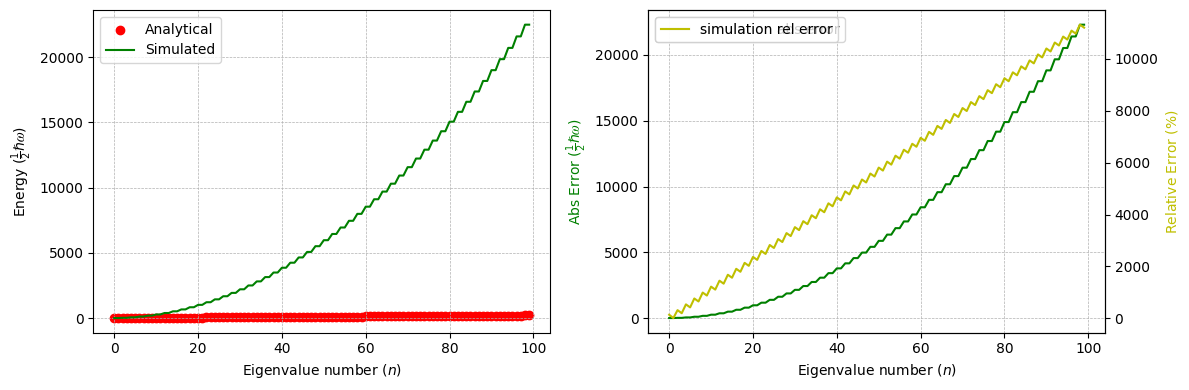

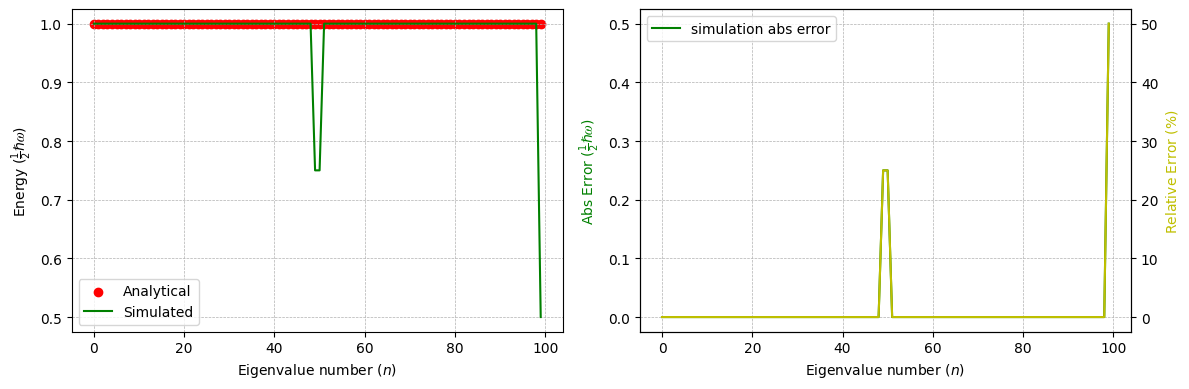

In [5]:
test_QHO_accuracy(N=99, x_min=-150, x_max=150, max_n=100, min_n=0)

Testing QHO accuracy
N:  999
Min x:  -5
Max x:  5
Delta x 0.01001001001001001
Min n:  0
Max n:  1000


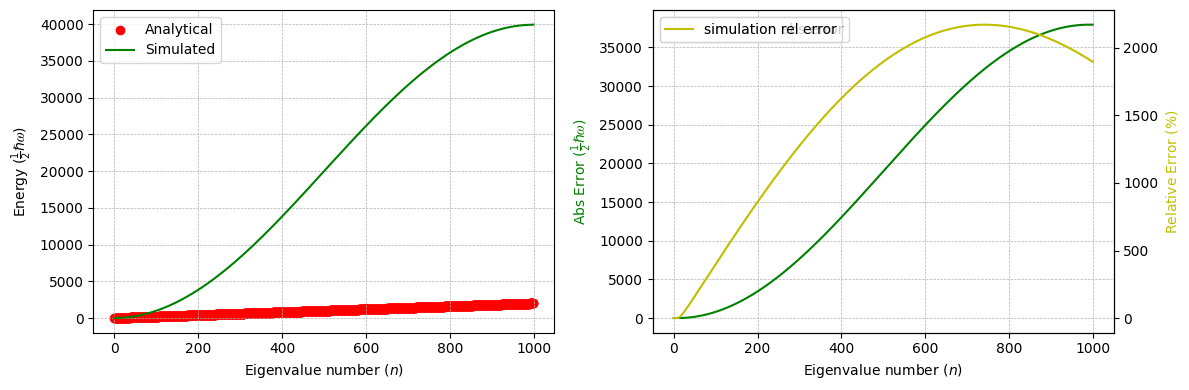

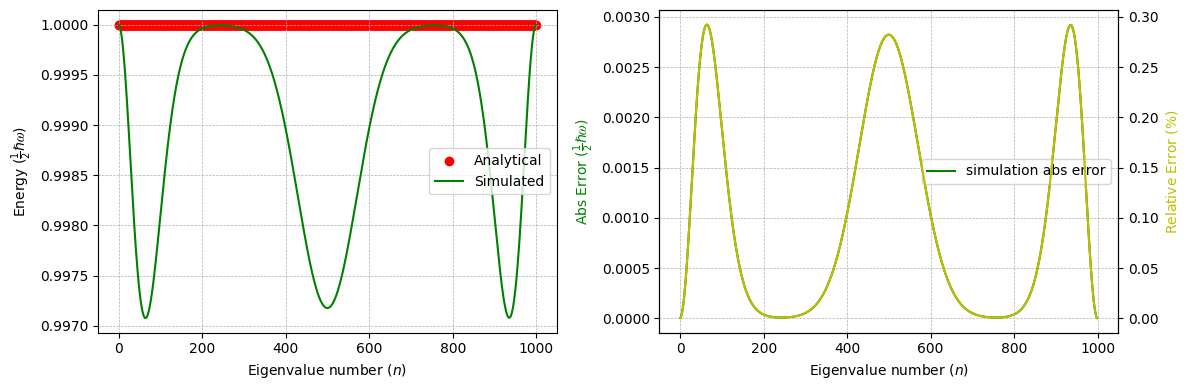

In [8]:
test_QHO_accuracy(N=999, x_min=-5, x_max=5, max_n=1000, min_n=0)

Testing QHO accuracy
N:  999
Min x:  -50
Max x:  50
Delta x 0.1001001001001001
Min n:  0
Max n:  1000


a:\Users\Ada\GitHub\QuantumHarmonics\QuantumHarmonics\QHO_Analytical.py:38: RuntimeWarning: invalid value encountered in multiply
  term = prefactor * hermite * gaussian  # Multiply Hermite polynomial by Gaussian


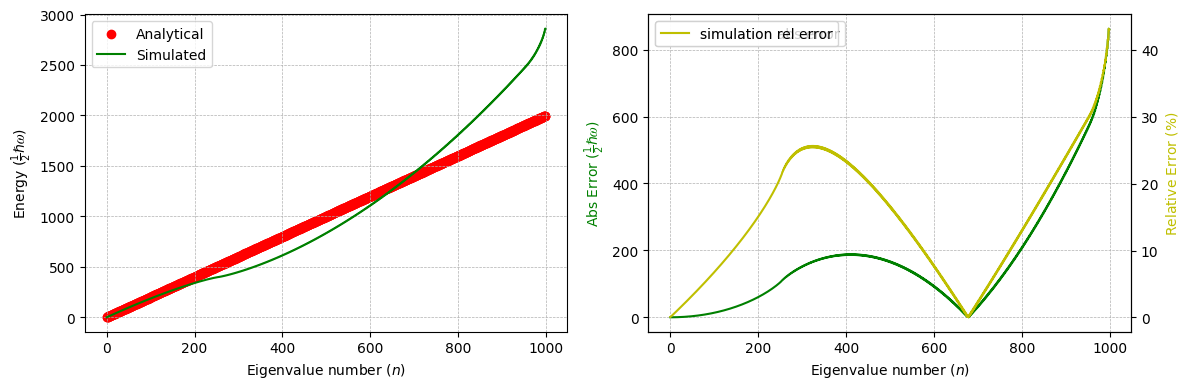

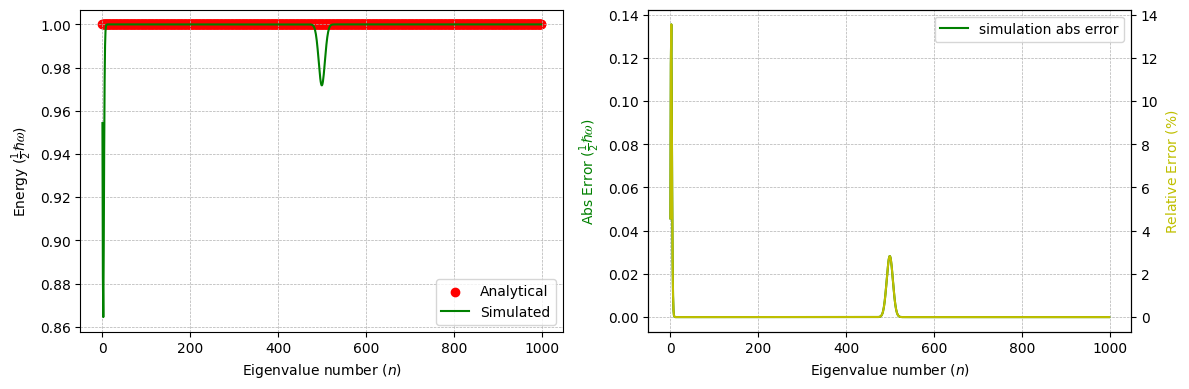

In [9]:
test_QHO_accuracy(N=999, x_min=-50, x_max=50, max_n=1000, min_n=0)

Testing QHO accuracy
N:  999
Min x:  -100
Max x:  100
Delta x 0.2002002002002002
Min n:  0
Max n:  1000


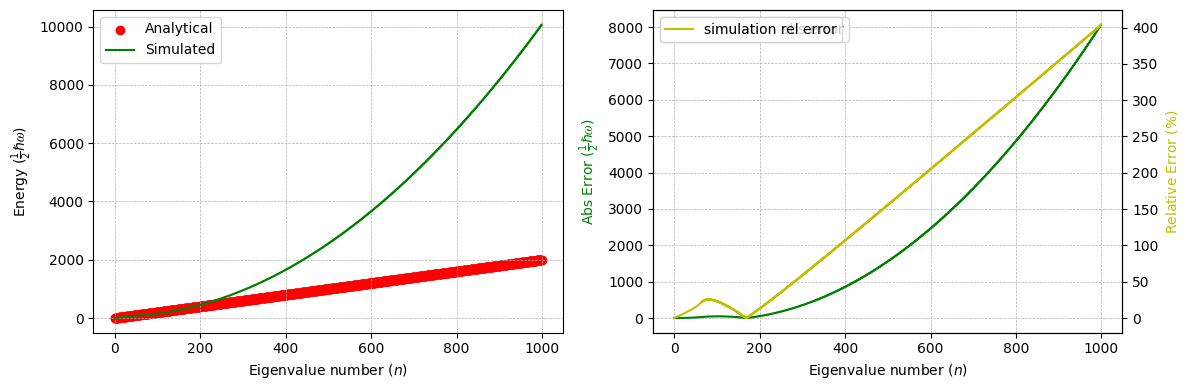

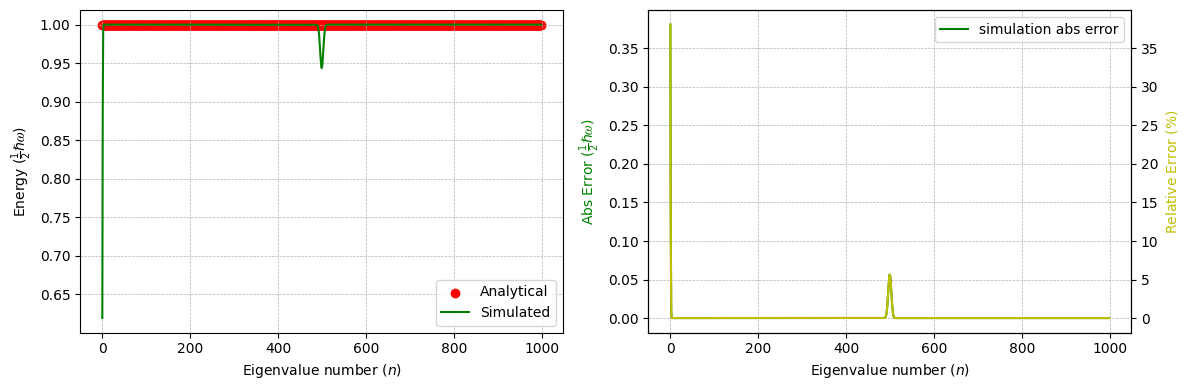

In [10]:
test_QHO_accuracy(N=999, x_min=-100, x_max=100, max_n=1000, min_n=0)

Testing QHO accuracy
N:  9999
Min x:  -1000
Max x:  1000
Delta x 0.2000200020002
Min n:  0
Max n:  10000


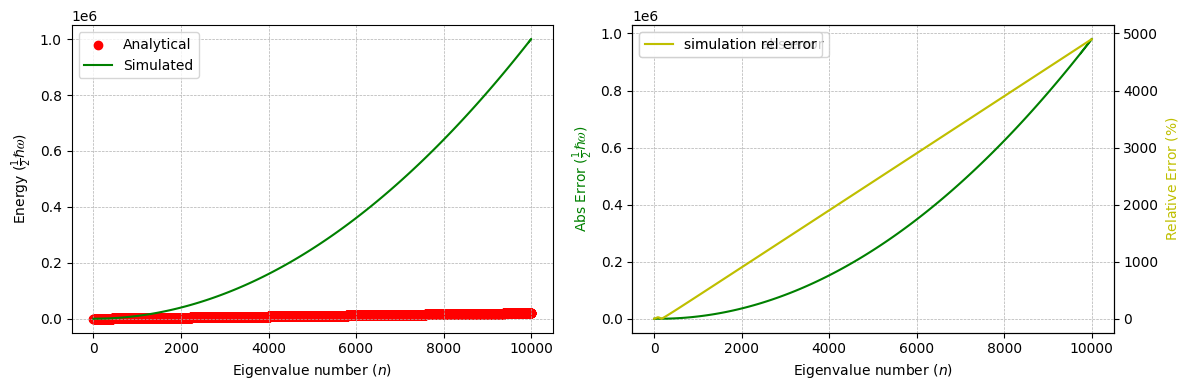

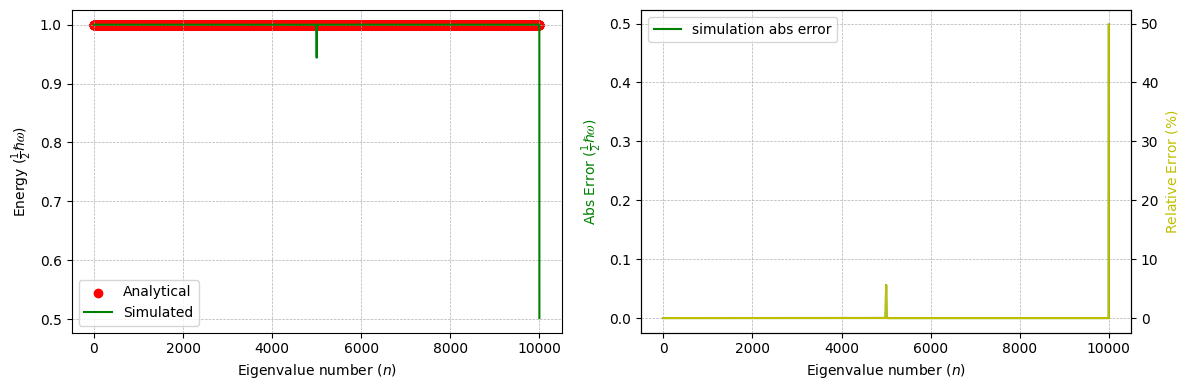

In [12]:
test_QHO_accuracy(N=9999, x_min=-1000, x_max=1000, max_n=10000, min_n=0)